In [1]:
import numpy as np
import scipy.io as scio

##### Load mat

In [4]:
data_pre=scio.loadmat('N:\RS\ICA-FCN-RF\Indian_pines.mat')['indian_pines']
print(data_pre.shape)

(145, 145, 220)


##### Gaussian Filter

In [5]:
from scipy.ndimage import gaussian_filter
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
gau_result=np.zeros(data_pre.shape)
for i in tqdm(range(data_pre.shape[2])):
    gau_result[:,:,i]=gaussian_filter(data_pre[:,:,i],1.5)

100%|██████████████████████████████████████████████████████████████████████████████| 220/220 [00:00<00:00, 1257.86it/s]


Text(0.5, 1.0, 'gaussian')

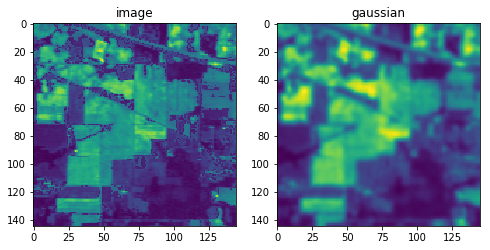

In [8]:
plt.figure(1,figsize=(8,6))
plt.subplot(1,2,1)
plt.imshow(data_pre[:,:,30])
plt.title('image')
plt.subplot(1,2,2)
plt.imshow(gau_result[:,:,30])
plt.title('gaussian')

In [6]:
# #remove the water absorption bands
no_absorption=list(set(np.arange(0,103)) | set(np.arange(108,149)) | set(np.arange(163,219)))
gau_result_nowaterabsorption=gau_result[:,:,no_absorption]
print(gau_result_nowaterabsorption.shape)

(145, 145, 200)


In [11]:
scio.savemat('N:\RS\ICA-FCN-RF\indian_gau.mat',{'gau':gau_result})

##### BilateralFilter

In [132]:
import cv2

In [133]:
bil_result=np.zeros(data_pre.shape)
for i in tqdm(range(data_pre.shape[2])):
    bil_result[:,:,i]=cv2.bilateralFilter(data_pre[:,:,i].astype(numpy.float32),5,500,500)

100%|██████████████████████████████████████████████████████████████████████████████| 220/220 [00:00<00:00, 1457.79it/s]


[[ -16.89111328   19.37548828  195.51660156 ...  123.28637695
   174.34741211   74.75244141]
 [-129.63867188  -35.05761719  170.41796875 ...  -63.67749023
   -83.94677734 -113.38134766]
 [-181.58203125 -137.44287109   63.93505859 ...  -22.60083008
    58.46191406   39.85717773]
 ...
 [ -12.21069336  -23.47851562    5.07299805 ...    1.8371582
     8.74975586  -30.50585938]
 [ -21.45629883    8.37451172   -0.45776367 ...  -39.45629883
     9.11743164   29.83007812]
 [ -25.74047852   34.87597656   32.7199707  ...   27.52416992
    15.16625977   -5.39160156]]


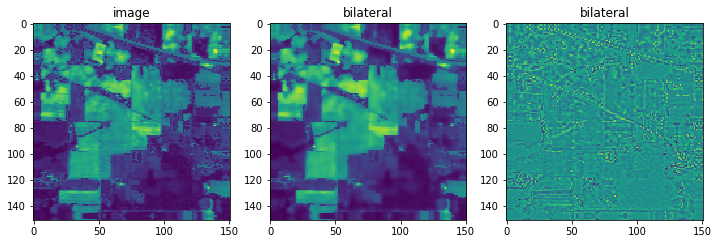

In [134]:
plt.figure(1,figsize=(12,10))
plt.subplot(1,3,1)
plt.imshow(data_pre[:,:,30]*5)
plt.title('image')
plt.subplot(1,3,2)
plt.imshow(bil_result[:,:,30]*5)
plt.title('bilateral')
plt.subplot(1,3,3)
plt.imshow((bil_result[:,:,30]-data_pre[:,:,30])*2)
plt.title('bilateral')
print(bil_result[:,:,30]-data_pre[:,:,30])

In [135]:
scio.savemat('indian_expand_bil.mat',{'data':bil_result})

##### Guided Filter

In [4]:
import matlab
import matlab.engine

In [5]:
engine = matlab.engine.start_matlab()#启动matlab

In [141]:
gui_result=np.zeros(data_pre.shape)
for i in tqdm(range(data_pre.shape[2])):
    datalist=data_pre[:,:,i].tolist()
    gui_temp=engine.imguidedfilter(matlab.double(datalist))
    gui_result[:,:,i]=np.array(gui_temp)

100%|████████████████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.54it/s]


[[-1.09262110e-05  4.79118353e-06  5.66560789e-05 ...  1.57249783e-05
  -7.87492445e-06 -1.18519938e-05]
 [-3.36727644e-05 -7.65918867e-06  5.01650716e-05 ... -1.77686520e-05
  -1.79586655e-05 -1.76208541e-05]
 [-4.65831772e-05 -3.22541318e-05  2.57618549e-05 ...  1.55160724e-05
   1.81876467e-05  1.84625942e-05]
 ...
 [-3.56495504e-04 -3.95683134e-04  8.43894513e-05 ... -1.65749026e-04
   6.30896916e-05 -5.56947139e-04]
 [-3.09452533e-04  1.31835224e-04  1.24072569e-04 ... -7.96648659e-04
   1.26010684e-04  5.78308663e-04]
 [-2.13582228e-04  4.81925223e-04  5.15739829e-04 ...  3.41074009e-04
   4.23615830e-04  1.56661076e-05]]


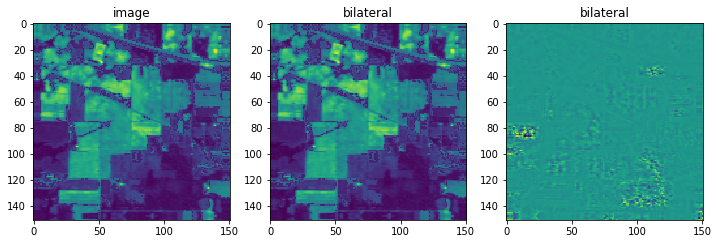

In [142]:
plt.figure(1,figsize=(12,10))
plt.subplot(1,3,1)
plt.imshow(data_pre[:,:,30]*5)
plt.title('image')
plt.subplot(1,3,2)
plt.imshow(gui_result[:,:,30]*5)
plt.title('bilateral')
plt.subplot(1,3,3)
plt.imshow((gui_result[:,:,30]-data_pre[:,:,30])*2)
plt.title('bilateral')
print(gui_result[:,:,30]-data_pre[:,:,30])

In [143]:
scio.savemat('indian_expand_gui.mat',{'data':gui_result})

#####  RGF

In [18]:
rgf_result=np.zeros(data_pre.shape)
r=data_pre.shape[0]
c=data_pre.shape[1]
z=data_pre.shape[2]
#for i in tqdm(range(data_pre.shape[2])):
datalist=data_pre.tolist()
rgf_temp=engine.RollingGuidanceFilter(matlab.double(datalist),r,c,z,5,20,5)#img-3D,sigma_s,sigma_r,n_iter
rgf_result=np.array(rgf_temp)

[[-42.58008429  75.04534192 101.79787105 ...   0.           0.
   42.63132154]
 [-18.34052814   2.09833532  -3.6        ...  42.57172341  18.76700819
   -6.75853553]
 [  0.         -47.49578653 -35.39745205 ...  -9.69549362   0.
    0.        ]
 ...
 [-18.25270956 -19.62273406  14.97224131 ... -13.31453956   1.51249895
  -32.36139453]
 [-15.15128754  20.49871371  22.02955942 ... -46.49235459   4.34053475
   25.46902502]
 [-43.0054463   15.07899926  23.24491456 ...  17.33432691  18.17565813
    0.29487571]]


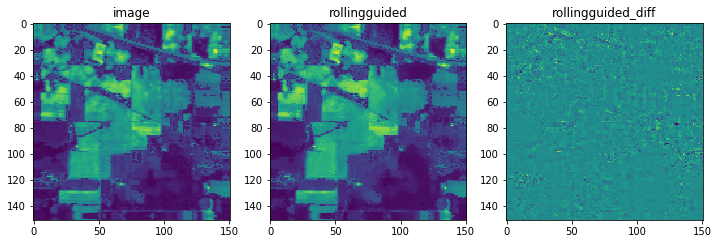

In [17]:
plt.figure(1,figsize=(12,10))
plt.subplot(1,3,1)
plt.imshow(data_pre[:,:,30])
plt.title('image')
plt.subplot(1,3,2)
plt.imshow(rgf_result[:,:,30])
plt.title('rollingguided')
plt.subplot(1,3,3)
plt.imshow((rgf_result[:,:,30]-data_pre[:,:,30])*2)
plt.title('rollingguided_diff')
print(rgf_result[:,:,30]-data_pre[:,:,30])